In [1]:
import os

from hoeEncode.ConvexHullEncoding.ConvexHull import ConvexEncoder
from hoeEncode.encode.ffmpeg.ChunkOffset import ChunkObject
from hoeEncode.encode.ffmpeg.FfmpegUtil import EncoderJob, EncoderConfigObject

chunk = ChunkObject(
    path="/mnt/sda1/downloads/Dark.Phoenix.2019.1080p.BluRay.REMUX.AVC.DTS-HD.MA.7.1-FGT/Dark.Phoenix.2019.1080p.BluRay.REMUX.AVC.DTS-HD.MA.7.1-FGT.mkv",
    first_frame_index=135148, last_frame_index=135208)

if not os.path.exists("./test/"):
    os.mkdir("./test/")

job = EncoderJob(chunk, 10, './test/chank.ivf')
config = EncoderConfigObject()
config.temp_folder = "./test/"
config.convex = True
config.vmaf = 95
config.bitrate = "2000K"

convex = ConvexEncoder(job, config)
runs = convex.run()

bitrate tests 12
speed 12 took: 165.10197114944458 seconds
bitrate tests 8
speed 8 took: 180.15945553779602 seconds
bitrate tests 6
speed 6 took: 174.11852645874023 seconds
bitrate tests 4
speed 4 took: 180.41106843948364 seconds
bitrate tests 3
speed 3 took: 189.83819389343262 seconds


99.90627 : 6656K
96.043319 : 1469K
slope -6.7306056949725575
Linear approximation for 94vmeth: 57.1180773455319


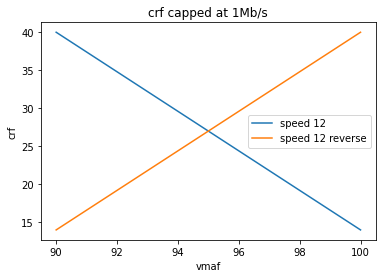

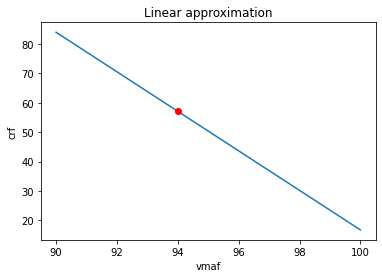

In [66]:
from matplotlib import pyplot as plt

import pickle

path = "/home/kokoniara/dev/VideoSplit/hoeEncode/ConvexHullEncoding/test/chank_convex.ivf.bitrate.speed12.grain4.pt"
# path = "/home/kokoniara/dev/VideoSplit/hoeEncode/ConvexHullEncoding/test_formal/chank_convex.ivf.bitrate.speed12.grain1.pt"
with open(path,
          'rb') as f:
    run = pickle.load(f)

# new plot
plt.figure()

for point in run:
    print(f'{point.vmaf} : {int(point.rate / 1000)}K')

test = run

x = []
y = []
y_revse = []

xmin = min(point.vmaf for point in test)
xmax = max(point.vmaf for point in test)

for point in test:
    # x.append(point.rate / 1000)
    # y.append(point.vmaf)
    rescaled_vmaf = 90 + (point.vmaf - xmin) * (100 - 90) / (xmax - xmin)

    y.append(point.target_rate)
    x.append(rescaled_vmaf)

y_revse = y[::-1]

# add legends
plt.title("crf capped at 1Mb/s")
plt.plot(x, y, label=f"speed {test[0].speed}")
plt.plot(x, y_revse, label=f"speed {test[0].speed} reverse")
plt.legend()
plt.xlabel("vmaf")
plt.ylabel("crf")

points = []

speed_12_vmaf_modifier = 0.5
for point in test:
    points.append([point.vmaf + speed_12_vmaf_modifier, point.target_rate])
target_vmaf = 94



def chat_test():
    def find_middle(X, Y):
        # Combine the x and y arrays into a list of tuples
        curve_data = list(zip(X, Y))

        # Step 1: Calculate the length of the curve
        length = 0
        for i in range(len(curve_data) - 1):
            length += math.sqrt(
                (curve_data[i + 1][0] - curve_data[i][0]) ** 2 + (curve_data[i + 1][1] - curve_data[i][1]) ** 2)

        # Step 2: Divide the length of the curve by 2 to get the half-length
        half_length = length / 2

        # Step 3: Traverse the curve to find the point that is halfway along the length of the curve
        current_length = 0
        for i in range(len(curve_data) - 1):
            segment_length = math.sqrt(
                (curve_data[i + 1][0] - curve_data[i][0]) ** 2 + (curve_data[i + 1][1] - curve_data[i][1]) ** 2)
            if current_length + segment_length >= half_length:
                # Step 4: Interpolate between the last two points to find the point on the curve that is halfway along the length of the curve
                segment_remaining = half_length - current_length
                segment_ratio = segment_remaining / segment_length
                midpoint_x = curve_data[i][0] + (curve_data[i + 1][0] - curve_data[i][0]) * segment_ratio
                midpoint_y = curve_data[i][1] + (curve_data[i + 1][1] - curve_data[i][1]) * segment_ratio
                break
            current_length += segment_length

        return midpoint_x, midpoint_y

    mid_x, mid_y = find_middle(x, y)
    print(f"Middle point: {mid_x} : {mid_y}")

# chat_test()

def sklern_test():
    # Import the LinearRegression class.
    from sklearn.linear_model import LinearRegression

    # Create a linear regression object.
    lr = LinearRegression()
    X = [[point[0]] for point in points]
    y = [point[1] for point in points]
    # Fit the linear model to the data.
    lr.fit(X, y)

    # Make a prediction for a new data point.
    y_pred = lr.predict([[target_vmaf]])

    print(f"Predicted crf for {target_vmaf}vmaf(sklearn): {y_pred}")
    # sklern linar function and point
    plt.figure()
    plt.title('sklearn linear approximation')
    plt.plot(x, lr.predict(X), label=f"linear approximation")
    plt.xlabel("vmaf")
    plt.ylabel("crf")
    plt.plot(target_vmaf, y_pred, 'ro', label=f"target vmaf should be there")



def brad_test():
    def linear_approximation(points):
        """
        This function approximates any y and x using linear approximation.

        Args:
        points: A list of points, where each point is a list of two numbers, (x, y).

        Returns:
        A function that takes in an x-value and returns the y-value that is the linear approximation of the points.
        """

        # Find the slope of the line.
        slope = (points[1][1] - points[0][1]) / (points[1][0] - points[0][0])

        # Find the y-intercept of the line.
        y_intercept = points[0][1] - slope * points[0][0]

        print(f"slope {slope}")

        # Define the function that returns the linear approximation.
        def linear_approximation_function(x):
            return slope * x + y_intercept

        return linear_approximation_function

    linear_approximation_function = linear_approximation(points)

    print(f"Linear approximation for {target_vmaf}vmeth: {linear_approximation_function(target_vmaf)}")
    # new plot
    plt.figure()

    plt.title('Linear approximation')
    # plot the linear approximation
    plt.plot(x, [linear_approximation_function(vmaf) for vmaf in x], label=f"linear approximation")
    plt.xlabel("vmaf")
    plt.ylabel("crf")

    # put a point where the linar aproximation for target vmaf is
    plt.plot(target_vmaf, linear_approximation_function(target_vmaf), 'ro', label=f"target vmaf should be there")


brad_test()


In [ ]:
import os

from hoeEncode.ConvexHullEncoding.ConvexHull import ConvexEncoder
from hoeEncode.encode.ffmpeg.ChunkOffset import ChunkObject
from hoeEncode.encode.ffmpeg.FfmpegUtil import EncoderJob, EncoderConfigObject

chunk = ChunkObject(
    path="/mnt/sda1/downloads/Dark.Phoenix.2019.1080p.BluRay.REMUX.AVC.DTS-HD.MA.7.1-FGT/Dark.Phoenix.2019.1080p.BluRay.REMUX.AVC.DTS-HD.MA.7.1-FGT.mkv",
    first_frame_index=135148, last_frame_index=135208)

if not os.path.exists("./test/"):
    os.mkdir("./test/")

job = EncoderJob(chunk, 10, './test/chank.ivf')
config = EncoderConfigObject()
config.temp_folder = "./test/"
config.convex = True
config.vmaf = 95
config.bitrate = "2000K"

convex = ConvexEncoder(job, config)
run = convex.grain_tests()


In [1]:
import math
import matplotlib.pyplot as plt

grain = []
ssim = []
vmaf = []
psnr = []
for point in run:
    # since bitrate is in thousands, we need to divide by 1000
    grain.append(point.grain)
    ssim.append(point.ssim)
    vmaf.append(point.vmaf)
    psnr.append(point.psnr)

# add legends
plt.plot(grain, ssim, label=f"ssim")
plt.legend()
plt.xlabel("Grain")
plt.ylabel("Ssim")

# new plot
plt.figure()
plt.plot(grain, vmaf, label=f"vmaf")
plt.legend()
plt.xlabel("Grain")
plt.ylabel("Vmaf")

# new plot
plt.figure()
plt.plot(grain, psnr, label=f"psnr")
plt.legend()
plt.xlabel("Grain")
plt.ylabel("Psnr")


def find_middle(X, Y):
    # Combine the x and y arrays into a list of tuples
    curve_data = list(zip(X, Y))

    # Step 1: Calculate the length of the curve
    length = 0
    for i in range(len(curve_data) - 1):
        length += math.sqrt(
            (curve_data[i + 1][0] - curve_data[i][0]) ** 2 + (curve_data[i + 1][1] - curve_data[i][1]) ** 2)

    # Step 2: Divide the length of the curve by 2 to get the half-length
    half_length = length / 2

    # Step 3: Traverse the curve to find the point that is halfway along the length of the curve
    current_length = 0
    for i in range(len(curve_data) - 1):
        segment_length = math.sqrt(
            (curve_data[i + 1][0] - curve_data[i][0]) ** 2 + (curve_data[i + 1][1] - curve_data[i][1]) ** 2)
        if current_length + segment_length >= half_length:
            # Step 4: Interpolate between the last two points to find the point on the curve that is halfway along the length of the curve
            segment_remaining = half_length - current_length
            segment_ratio = segment_remaining / segment_length
            midpoint_x = curve_data[i][0] + (curve_data[i + 1][0] - curve_data[i][0]) * segment_ratio
            midpoint_y = curve_data[i][1] + (curve_data[i + 1][1] - curve_data[i][1]) * segment_ratio
            break
        current_length += segment_length

    return midpoint_x, midpoint_y


midpoint_x, midpoint_y = find_middle(x, y)
# Print the result
print("Midpoint of the curve: ({}, {})".format(midpoint_x, midpoint_y))


AttributeError: 'RdPoint' object has no attribute 'grain'

In [2]:
from hoeEncode.ConvexHullEncoding.ConvexHull import RdPoint
# load pt file
import pickle

with open('/home/kokoniara/dev/VideoSplit/hoeEncode/ConvexHullEncoding/test/chank.ivf.bitrate.speed12.grain24.pt',
          'rb') as f:
    data = pickle.load(f)
print(data)



[<hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f5bb670>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f5bb430>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f5bbca0>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa278597d90>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa278594580>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f62bf10>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f628460>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f628730>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f62be80>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f62be50>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f62bfd0>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f123df0>, <hoeEncode.ConvexHullEncoding.ConvexHull.RdPoint object at 0x7fa22f122530>]


SvtAv1 film-grain compared to various metrics


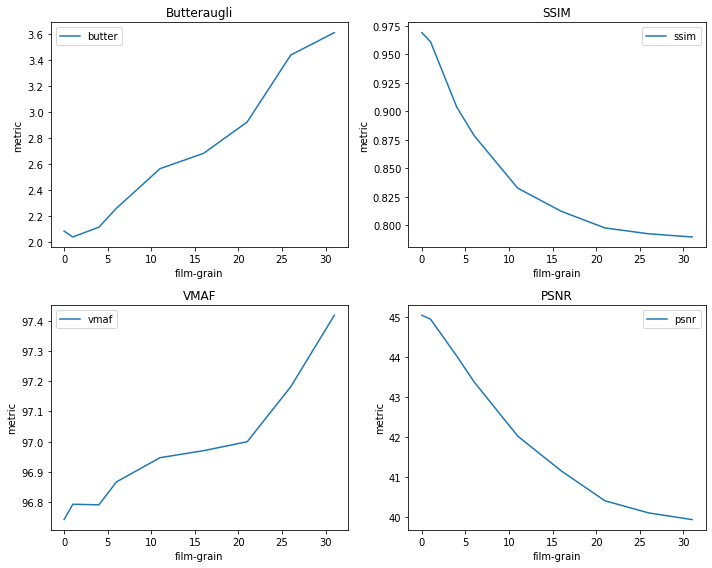

SvtAv1 film-grain compared to various metrics


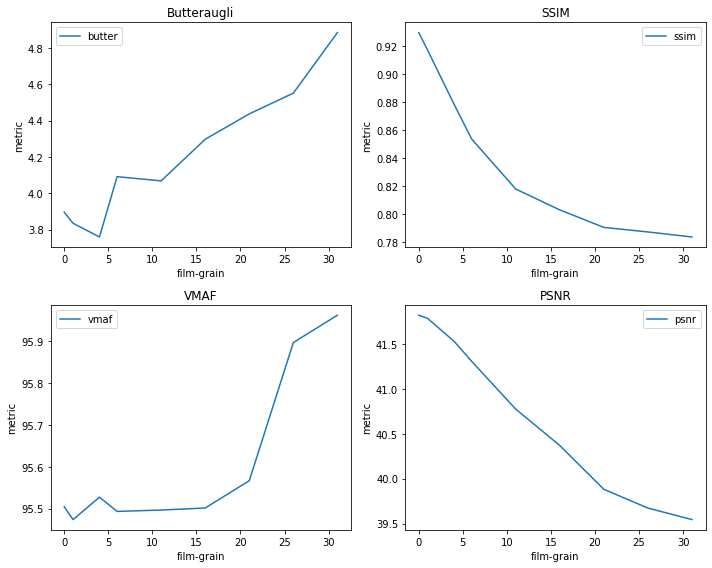

In [51]:
from typing import List
import pickle
import matplotlib.pyplot as plt


def plot_butter_test(path: str, title: str, metric: str = "butter") -> None:
    with open(path, 'rb') as f:
        data: List[RdPoint] = pickle.load(f)

    # extract data for the plot
    grains = []
    metric_points = []
    for point in data:
        grains.append(point.grain)
        metric_points.append(getattr(point, metric))

    # plot the data
    plt.plot(grains, metric_points, label=metric)
    plt.xlabel("film-grain")
    plt.ylabel("metric")
    plt.title(title)
    plt.legend()


def yes_sir(path):
    # main program
    print("SvtAv1 film-grain compared to various metrics")

    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plot_butter_test(path, "Butteraugli", "butter")

    plt.subplot(2, 2, 2)
    plot_butter_test(path, "SSIM", "ssim")

    plt.subplot(2, 2, 3)
    plot_butter_test(path, "VMAF", "vmaf")

    plt.subplot(2, 2, 4)
    plot_butter_test(path, "PSNR", "psnr")

    plt.tight_layout()
    plt.show()


yes_sir('/home/kokoniara/dev/VideoSplit/hoeEncode/ConvexHullEncoding/test/chank.grainButter.pt')

yes_sir('/home/kokoniara/dev/VideoSplit/hoeEncode/ConvexHullEncoding/test/chank30.grainButter.pt')